In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy.stats import norm

### 5(a)

In [2]:
p0 = 0.4
p1 = 0.6

$$R\left(h_{\theta}\right)=\mathrm{P}(Y=1) \int_{-\infty}^{\theta} f_{X}(x \mid Y=1) d x+\mathrm{P}(Y=0) \int_{\theta}^{\infty} f_{X}(x \mid Y=0) d x$$

In [3]:
def true_risk(theta):
    return p1 * norm.cdf(theta, loc=1, scale=2) + p0 * (1.0 - norm.cdf(theta, loc=-1, scale=2))

In [4]:
theta = np.linspace(-10, 10, 1000)

In [5]:
R = true_risk(theta)

In [6]:
def h(x, theta):
    if x < theta:
        return 0
    else:
        return 1

In [7]:
def empirical_risk(theta, N, X0, X1):
    
    errors = 0
    for x in X0:
        if h(x, theta) != 0:
            errors += 1
            
    for x in X1:
        if h(x, theta) != 1:
            errors += 1
    
    R_hat = errors / N
    
    return R_hat

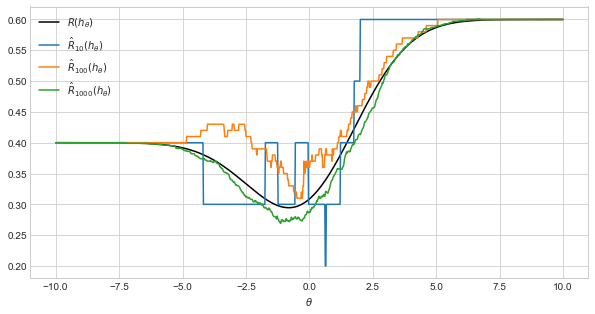

In [11]:
plt.figure(figsize=(10,5))
plt.plot(theta, R, color='k', label=r"$R(h_\theta)$")
for N in [10, 100, 1000]:
    X0 = np.random.normal(-1, 2, int(N*p0))
    X1 = np.random.normal(1, 2, int(N*p1))
    R_hat = [empirical_risk(theta_, N, X0, X1) for theta_ in theta]
    plt.plot(theta, R_hat, label=r"$\hat{R}_{%d}(h_\theta)$" %N)
    
plt.xlabel(r'$\theta$')
plt.legend()
plt.savefig('p5a-1.png')
plt.show()

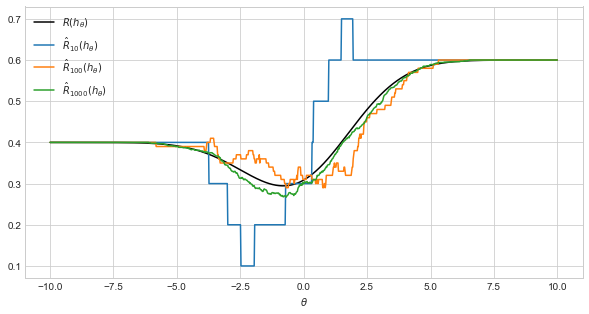

In [12]:
plt.figure(figsize=(10,5))
plt.plot(theta, R, color='k', label=r"$R(h_\theta)$")
for N in [10, 100, 1000]:
    X0 = np.random.normal(-1, 2, int(N*p0))
    X1 = np.random.normal(1, 2, int(N*p1))
    R_hat = [empirical_risk(theta_, N, X0, X1) for theta_ in theta]
    plt.plot(theta, R_hat, label=r"$\hat{R}_{%d}(h_\theta)$" %N)
    
plt.xlabel(r'$\theta$')
plt.legend()
plt.savefig('p5a-2.png')
plt.show()

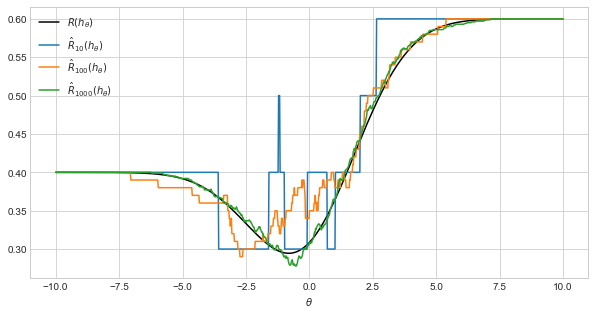

In [13]:
plt.figure(figsize=(10,5))
plt.plot(theta, R, color='k', label=r"$R(h_\theta)$")
for N in [10, 100, 1000]:
    X0 = np.random.normal(-1, 2, int(N*p0))
    X1 = np.random.normal(1, 2, int(N*p1))
    R_hat = [empirical_risk(theta_, N, X0, X1) for theta_ in theta]
    plt.plot(theta, R_hat, label=r"$\hat{R}_{%d}(h_\theta)$" %N)
    
plt.xlabel(r'$\theta$')
plt.legend()
plt.savefig('p5a-3.png')
plt.show()

### 5(b)

In [18]:
theta = 0.45

In [19]:
for N in [10, 100, 1000]:
    abs_error = []
    for exp in range(10000):
        X0 = np.random.normal(-1, 2, int(N*p0))
        X1 = np.random.normal(1, 2, int(N*p1))
        R = true_risk(theta)
        R_hat = empirical_risk(theta, N, X0, X1)
        abs_error.append(abs(R - R_hat))
    print(f"The expectation for N = {N} is {np.mean(abs_error)}")

The expectation for N = 10 is 0.11812458452483333
The expectation for N = 100 is 0.036761516845004574
The expectation for N = 1000 is 0.01161507716799021


### 5(c)

In [21]:
theta = np.linspace(-10, 10, 1000)
for N in [10, 100, 1000]:
    max_error = []
    for exp in range(1000):
        X0 = np.random.normal(-1, 2, int(N*p0))
        X1 = np.random.normal(1, 2, int(N*p1))
        abs_error = [abs(true_risk(theta_) - empirical_risk(theta_, N, X0, X1)) for theta_ in theta]
        max_error.append(np.max(abs_error))
    print(f"The expectation for N = {N} is {np.mean(max_error)}")

The expectation for N = 10 is 0.23944184496007376
The expectation for N = 100 is 0.08100658751949527
The expectation for N = 1000 is 0.025624962874579705


### 5(d)

In [22]:
theta = np.linspace(-10, 10, 1000)
for N in [10, 100, 1000]:
    R = []
    for exp in range(1000):
        X0 = np.random.normal(-1, 2, int(N*p0))
        X1 = np.random.normal(1, 2, int(N*p1))
        emp_risk = [empirical_risk(theta_, N, X0, X1) for theta_ in theta]
        argmin = np.argmin(emp_risk)
        R.append(true_risk(theta[argmin]))
    print(f"The expectation for N = {N} is {np.mean(R)}")

The expectation for N = 10 is 0.32875037751257763
The expectation for N = 100 is 0.30458172422026125
The expectation for N = 1000 is 0.2969256941987568


In [26]:
theta = np.linspace(-10, 10, 10000)
R = true_risk(theta)

In [27]:
print(f" the risk of the Bayes classifier"np.min(R))

0.2945025648085344
